 
# An Analysis Of The Impact Of Various Factors On Life Expectancy

 #  <font color='black'>1. Introduction</font>
 

Life expectancy is an estimate of how long a person would live on average. Throughout the years, there have been lot of studies on factors affecting life expectancy. However, these studies have not taken into account the possibility that human development index could have a significant effect. Additionally, past studies were conducted using multiple linear regressions based on world data for only one year. Therefore, there is reason to consider global data from 2000 to 2015 instead. This project relies heavily on the accuracy of the data which is provided by the Global Health Observatory (GHO) data repository under World Health Organization (WHO)$^{(1)}$. Our goal is to determine the most significant variables to create an optimal linear regression model for predicting life expectancy. For instance, if current mortality rates in every age group remained constant throughout, then it would be an easily understood measure to which any person could directly relate $^{(2)}$. In reality, life expectancy is affected by a variety of socioeconomic, genetic and environmental factors. Therefore, it makes for a good area of study to investigate via statistical methods to better understand the measure of life expectancy.


## 1.1 Loading necessary packages for the Analysis

In [96]:
install.packages("gganimate")
install.packages("corrr")
install.packages("plotly")
install.packages("tidygeocoder")
install.packages("elasticnet")
library(leaps)
library(gganimate)
library(tidyverse)
library(tidymodels)
library(corrr)
library(mltools)
library(ggplot2)
library(elasticnet)
library(plotly)
library(caret)
library(tidygeocoder)
library(glmnet)
library(GGally)
options(repr.plot.width = 8, repr.plot.height = 8)
library(knitr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## 1.2 Loading dataset from Github

In [133]:
data <- read.csv("https://raw.githubusercontent.com/zackhamza01/Life-Expectancy/main/Life%20Expectancy%20Data.csv")

# 2. Methods and Results

To begin with, we first performed some data cleaning and exploration. The exploration was very necessary for us to have a deeper understanding of the dataset before the process of gaining insights from it.

## 2.1 Exploratory Data Analysis

### 2.1.1 Data Preview and Cleaning

In [134]:
cat("Table 1")
data %>% head(3)

Table 1

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.27962,65,1154,⋯,6,8.16,65,0.1,584.2592,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.52358,62,492,⋯,58,8.18,62,0.1,612.6965,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.21924,64,430,⋯,62,8.13,64,0.1,631.7450,31731688,17.7,17.7,0.470,9.9


This dataset contains variables such as country, year, status, life expectancy, etc. The `Adult.Mortality` column represents the adult mortality rates of both genders, which is the probability of dying between 15 and 60 years per 1000 population. `Infant.deaths` showcases the number of infant deaths per 1000 population. The `Alcohol` column describes the total litres of consumption for pure alcohol, which is recorded per capita for ages 15 and older. The `Hepatitis.B`, `Polio`, and `Diphteria` variables demonstrate the percentage of immunization coverage among 1-year-olds for each of those diseases. The `Measles` column signifies the number of reported cases of the measles per 1000 population. thinness..1.19.years` represents the percentage of thinness present in children ranging from the age of 10 to 19 years old. 

We looked at the range of life expectancy in the dataset.

Life expectancy ranges from 44 to 89. This means that the people in the country with the highest life expectancy lived almost twice as long as the ones in the country with the lowest life expectancy.

The dataframe has 1649 rows and 20 attributes.

### 2.1.2 Variable Correlation

#### Categorical Variables

#####  Comparison of mean life expectancy rate between developed and developing countries
To get an understanding of how the development status of a country is correlated with life expectancy, we compared the mean life expectancy of developed and developing countries.

In [135]:
cat("Table 2")
data %>%
    filter(Life.expectancy>0)%>%
    group_by(Status) %>%
    summarize(mean_expectancy=mean(Life.expectancy))

Table 2

Status,mean_expectancy
<chr>,<dbl>
Developed,79.19785
Developing,67.11147


In the table above, we saw that on average, people in developed countries lived almost a decade longer than people in developing countries.

To better vizualize the correlation between the development status of a country and Life expectancy, we created a boxplot as shown below. 

Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 10 rows containing non-finite values (stat_summary).”


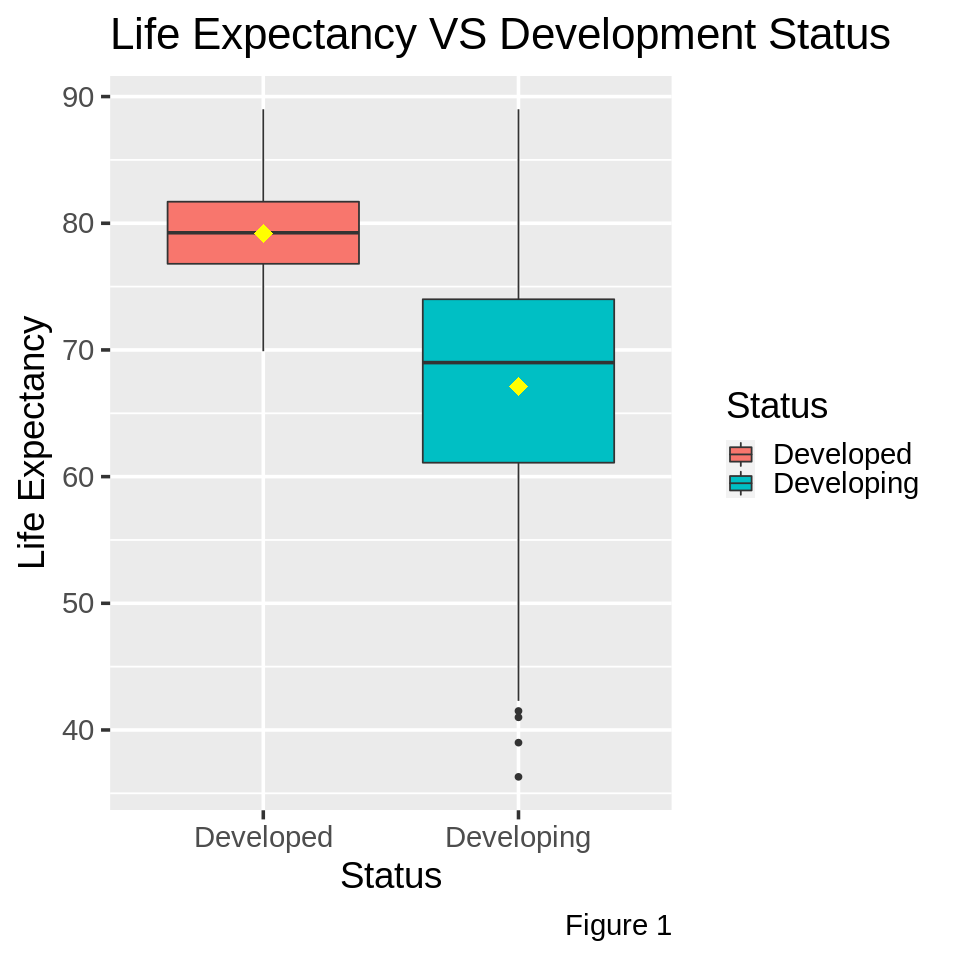

In [136]:
#Plot showing life expectancy in different country status
initial_plot <- data %>%
    ggplot()+ 
    geom_boxplot(aes(Status, Life.expectancy, fill= Status)) +
    ggtitle("Life Expectancy VS Development Status") +
    stat_summary(aes(x = Status, Life.expectancy),
     fun = mean, colour = "yellow", geom = "point",
     shape = 18, size = 5
   )+
    theme_grey(base_size = 22)+
    labs(x="Status", y="Life Expectancy", caption = "Figure 1")
initial_plot

As we can see here, there is a stark difference in the life expectancy in developing and developed countries. To begin with, the interquartile range of life expectancy is lower in developed than developing countries.The mean and median are both much higher in developed countries. The minimum life expectancy is also much lower in developing countries. Thus, we can see that the status of the country could affect life expectancy.

The next categorical variable is Country. To show this, we created a map depicting the average life expectancy in each country.

In [137]:
cat("Figure 2")
new_data <- data %>% na.omit()
summary_data <- new_data %>% 
    group_by(Country) %>% 
    summarize(mean=mean(Life.expectancy))

g <- list(
showframe = TRUE,
showcoastlines = TRUE,
projection = list(type = 'Mercator')
)

plot <- plot_geo(summary_data, locationmode="country names")%>%
    add_trace(locations=~Country,
             z=~mean,
             color=~mean) %>%
    layout(
  title = with(summary_data, paste('Mean Life Expectancy')),
  geo = g
)

Figure 2

Due to a bug in htmlwidgets, rendering the interractive plotly object in the code cell above fails to show in an html file. Therefore, we took a screenshot of the plot as shown below for a quick look. However, you can uncomment the plot object and hover over the countries to see the mean life expectancy in different countries.
Here we see that sub-saharan african countries are amongst the lowest life expectancy regions while Canada, Europe and Australia amongst the highest.

<img src="https://github.com/Blaise143/test_repo/raw/main/Screen%20Shot%202021-11-01%20at%2011.53.44%20PM.png">

#### Continuous Variables

To demonstrate the correlation between continuous variables and life expectancy, we created a correlation map.

Figure 3

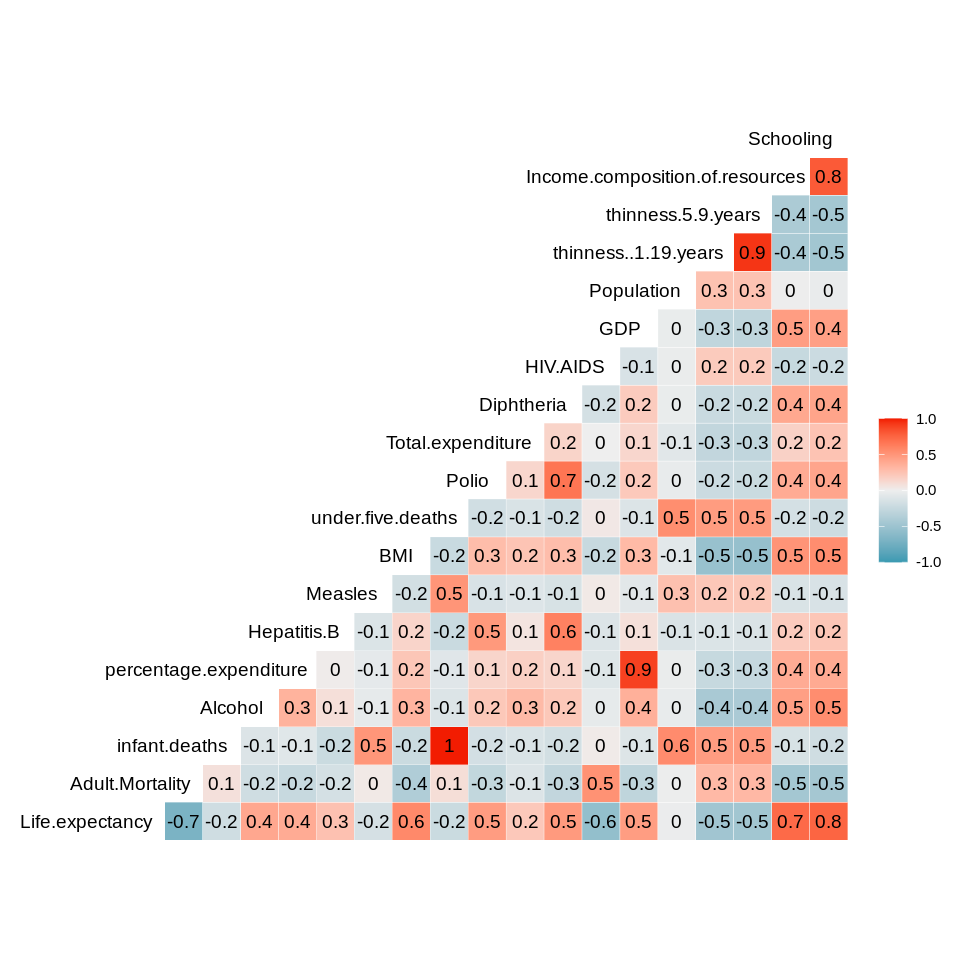

In [138]:
# Removing non-numeric variables for analysis of multicollinearity
cat("Figure 3")
data_num <- data %>% select(-Country, -Year, -Status)

ggcorr(
  data_num,
  cor_matrix = cor(data_num, use = "pairwise"),
    label = T, 
    hjust = 0.95,
    angle = 0,
    size = 4,
    layout.exp = 3
)

##### Observations
- The variables that life expectancy is most positively related are: schooling, and income composition of resources. 
- The variables most negatively associated with life expectancy are: adult mortality and HIV/AIDS. 
- Life expectancy has a negligible relationship with Population, Total expenditure, under-five deaths and Measles.
- From the above observations, we would expect to see schooling, income composition of resources, adult mortality, and HIV/AIDS to have the largest impact in our linear model while Population, Total expenditure, under-five deaths and Measles are expected to have a smaller impact in the linear model.

## 2.2 Variable Selection

### 2.2.1 Preparing the data
Our first step is to ensure all of our variables can be used in the regression and then splitting the dataset into testing and training sets. For this study, we will be using a proportion of 0.75. We will not be using the Country and Year categories in this model as our aim is to predict the life expectancy based on factors that are more general and not specific to a place or time. Furthermore, the Country variable has over 150 levels, which will make our model extremely large. 

In [139]:
#Making status a factor to be used in regression
data <- data %>% 
    select(-Country) %>%
    select(-Year) %>%
    mutate(Status = if_else(Status == "Developing", 0, 1)) %>%
    na.omit()
data$Status <- as.factor(data$Status)

#splitting data into testing and training sets
set.seed(123)
initial_split <- initial_split(data, prop = 0.75)
expectancy_train <- training(initial_split)
expectancy_test <- testing(initial_split)

cat("Table 3")
expectancy_train %>% head(2)
cat("Table 4")
expectancy_test %>% head(2)

Table 3

,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
676,1,81.0,54,0,9.04,212.08593,96,0,59.2,0,99,7.46,99,0.1,2797.967,1143896,0.9,1.0,0.850,13.8
799,0,74.4,151,8,3.69,18.26183,82,0,45.8,10,97,6.46,87,0.3,244.469,1328961,1.5,1.4,0.679,12.6


Table 4

,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0,59.9,268,66,0.01,73.21924,64,430,18.1,89,62,8.13,64,0.1,631.7450,31731688,17.7,17.7,0.470,9.9
7,0,58.6,281,77,0.01,56.76222,63,2861,16.2,106,63,9.42,63,0.1,445.8933,284331,18.6,18.7,0.434,8.9


### 2.2.2 Backward Selection
We will now be performing variable selection using regsubsets. Our nvmax is 19 as there are 19 remaining variables in the dataset.

In [140]:
#Variable selection 
cat("Table 5")
backward_sel <- regsubsets(x=Life.expectancy ~.,data= expectancy_train, nvmax=19, method="backward")

#backward_sel
back_summary <- summary(backward_sel)

back_summary_df <- data.frame( 
   RSQ = back_summary$rsq,
   RSS = back_summary$rss,
   ADJ.R2 = back_summary$adjr2,
   BIC = back_summary$bic
)
back_summary_df %>% head()

Table 5

,RSQ,RSS,ADJ.R2,BIC
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5177821,46475.58,0.5173913,-887.2486
2,0.7279422,26220.60,0.7275009,-1587.5926
3,0.7898490,20254.10,0.7893372,-1899.5934
4,0.8105975,18254.38,0.8099821,-2020.9589
5,0.8145800,17870.55,0.8138263,-2040.1052
6,0.8249509,16871.02,0.8240963,-2104.1260


In [141]:
## Using Mallow's C_P to find the right number of inputs
backward_sel_candidate_models <- tibble(
  n_input_variables = rep(1:19),
  C_p =back_summary$cp
)
cat("The best number of predictors to be selected is ", backward_sel_candidate_models %>% filter(C_p==min(C_p)) %>% pull(n_input_variables))
cat("\nTable 6")
backward_sel_candidate_models

The best number of predictors to be selected is  12
Table 6

n_input_variables,C_p
<int>,<dbl>
1,2404.139354
2,821.437844
3,356.633125
4,202.179469
5,174.149690
6,97.948598
7,50.986642
8,19.934640
9,13.454595


Figure 4

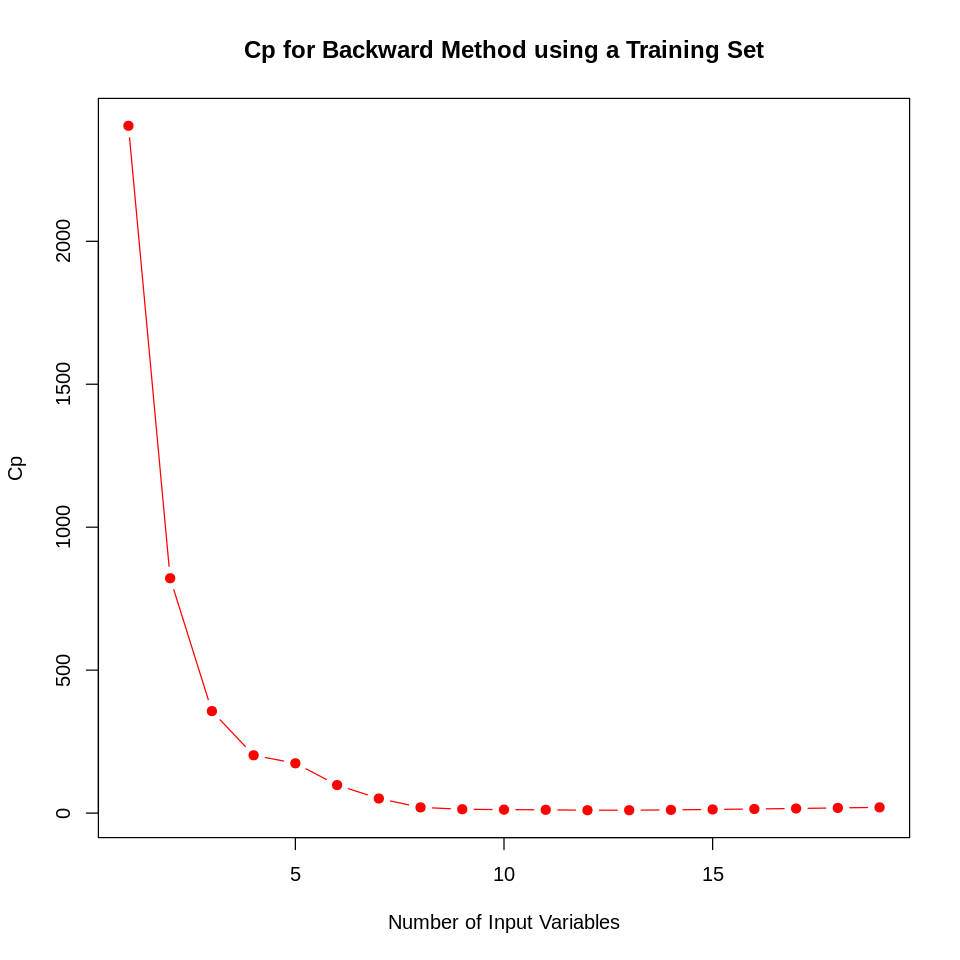

In [142]:
cat("Figure 4")
plot(back_summary$cp,
    main = "Cp for Backward Method using a Training Set",
  xlab = "Number of Input Variables", ylab = "Cp", type = "b", pch = 19,
  col = "red")

The results of our backward selection tell us that the model with 12 variables is the best model, as it has the lowest $C_p$ of 9.988715. 

In [143]:
back_summary

Subset selection object
Call: regsubsets.formula(x = Life.expectancy ~ ., data = expectancy_train, 
    nvmax = 19, method = "backward")
19 Variables  (and intercept)
                                Forced in Forced out
Status1                             FALSE      FALSE
Adult.Mortality                     FALSE      FALSE
infant.deaths                       FALSE      FALSE
Alcohol                             FALSE      FALSE
percentage.expenditure              FALSE      FALSE
Hepatitis.B                         FALSE      FALSE
Measles                             FALSE      FALSE
BMI                                 FALSE      FALSE
under.five.deaths                   FALSE      FALSE
Polio                               FALSE      FALSE
Total.expenditure                   FALSE      FALSE
Diphtheria                          FALSE      FALSE
HIV.AIDS                            FALSE      FALSE
GDP                                 FALSE      FALSE
Population                          FA

The 12 variables include: `Status`, `Adult.Mortality`, `infant.deaths`, `percentage.expenditure`, `BMI`, `under.five.deaths`, `Diphtheria`, `HIV.AIDS`, `thinness.5.9.years`, `Income.composition.of.resources`, `Schooling` and `Alcohol`. 


#### Observations
- Polio and Hepatitis B are not included in this model while Diphtheria is. This suggests that Diphtheria affects life expectancy more than the other two diseases, which could be due to the fact that Diphtheria is more fatal in children (fatality rate is 5-10%, while Polio's is 2-5% and Hepatitis B' s is around 0.42 per 100000 population). 
- Thinness 5-9 years is selected, but not thinness 10-19 years. This could be due to the fact that thinness and malnutrition during childhood may lead to people dying earlier, and so it has a larger impact on life expectancy and was thus included in the model. 
- While Status and percentage expenditure both impact life expectancy, GDP and total expenditure do not. This makes sense as GDP and total expenditure are both absolute measures, and do not consider population of a country, while percentage expenditure takes into account the differences between population and cost of living in different areas. 

### 2.2.3 Forward Selection
Using the same methods, we will now be performing forward selection.

In [144]:
### Forward selection
cat("Table 7")
forward_sel <- regsubsets(x=Life.expectancy ~.,data= expectancy_train, nvmax=19, method="forward")

forward_summary <- summary(forward_sel)

forward_summary_df <- data.frame( 
   RSQ = forward_summary$rsq,
   RSS = forward_summary$rss,
   ADJ.R2 = forward_summary$adjr2,
   BIC = forward_summary$bic
)
forward_summary_df %>% head()

Table 7

,RSQ,RSS,ADJ.R2,BIC
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5177821,46475.58,0.5173913,-887.2486
2,0.7279422,26220.60,0.7275009,-1587.5926
3,0.7898490,20254.10,0.7893372,-1899.5934
4,0.8105975,18254.38,0.8099821,-2020.9589
5,0.8161367,17720.52,0.8153893,-2050.5256
6,0.8216015,17193.83,0.8207306,-2080.6997


In [145]:
## Using Mallow's C_P to find the right number of inputs
forward_sel_candidate_models <- tibble(
  n_input_variables = rep(1:19),
  C_p = forward_summary$cp
)
cat("The best number of predictors to be selected is ", forward_sel_candidate_models %>% filter(C_p==min(C_p)) %>% pull(n_input_variables))
cat("\nTable 8")
forward_sel_candidate_models

The best number of predictors to be selected is  12
Table 8

n_input_variables,C_p
<int>,<dbl>
1,2404.139354
2,821.437844
3,356.633125
4,202.179469
5,162.411842
6,123.204489
7,106.087435
8,19.934640
9,13.454595


Figure 5

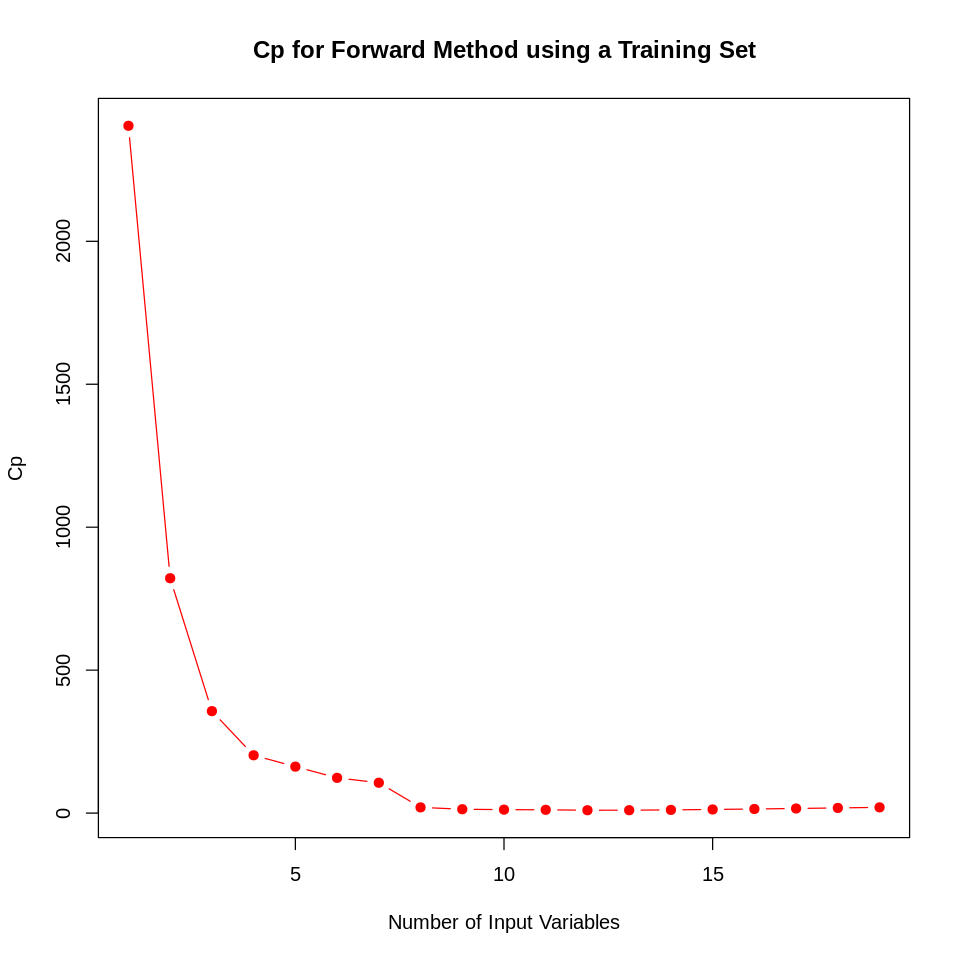

In [146]:
cat("Figure 5")
plot(forward_summary$cp,
    main = "Cp for Forward Method using a Training Set",
  xlab = "Number of Input Variables", ylab = "Cp", type = "b", pch = 19,
  col = "red")

The model size we get is the same for both forward and backward selection, and contains the same variables. Due to multicollinearity, we will be removing the `Schooling` and `infant.deaths` from our model. The covariates we will be using are listed below as stepwise_selection. 

In [147]:
#Stepwise Selected Covariates
stepwise_selection <- data %>%
    select( -Hepatitis.B, -Measles, -Polio, -Total.expenditure, -GDP, 
           -Population, -thinness..1.19.years, -Schooling, -infant.deaths) %>%
    names() 
stepwise_selection

[1] "Status"                          "Life.expectancy"                
 [3] "Adult.Mortality"                 "Alcohol"                        
 [5] "percentage.expenditure"          "BMI"                            
 [7] "under.five.deaths"               "Diphtheria"                     
 [9] "HIV.AIDS"                        "thinness.5.9.years"             
[11] "Income.composition.of.resources"

Below, we can find our model, and the summary of our model.

In [148]:
MLR_expectancy <- lm(Life.expectancy ~ Status + Adult.Mortality + percentage.expenditure
                     + BMI + under.five.deaths + Diphtheria + Alcohol + 
                     HIV.AIDS + thinness.5.9.years + Income.composition.of.resources, data = expectancy_train)
summary(MLR_expectancy)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + percentage.expenditure + 
    BMI + under.five.deaths + Diphtheria + Alcohol + HIV.AIDS + 
    thinness.5.9.years + Income.composition.of.resources, data = expectancy_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8030  -2.3470   0.1408   2.2385  14.0714 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.851e+01  7.554e-01  77.455  < 2e-16 ***
Status1                          1.241e+00  4.297e-01   2.888 0.003940 ** 
Adult.Mortality                 -2.061e-02  1.175e-03 -17.539  < 2e-16 ***
percentage.expenditure           4.885e-04  7.714e-05   6.332 3.38e-10 ***
BMI                              5.700e-02  7.478e-03   7.623 4.95e-14 ***
under.five.deaths               -2.710e-03  7.291e-04  -3.717 0.000211 ***
Diphtheria                       2.744e-02  5.499e-03   4.989 6.93e-07 ***
Alcohol                         -1.193e-02

In [149]:
MLR_expectancy_2 <- lm(Life.expectancy ~ Status + Adult.Mortality + percentage.expenditure
                    + BMI + under.five.deaths + Diphtheria + Alcohol + 
                    HIV.AIDS + thinness.5.9.years + Income.composition.of.resources + 
                      infant.deaths + Schooling, data = expectancy_train)
summary(MLR_expectancy_2)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + percentage.expenditure + 
    BMI + under.five.deaths + Diphtheria + Alcohol + HIV.AIDS + 
    thinness.5.9.years + Income.composition.of.resources + infant.deaths + 
    Schooling, data = expectancy_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.784  -2.029   0.058   2.246  11.748 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.467e+01  7.912e-01  69.102  < 2e-16 ***
Status1                          7.343e-01  3.917e-01   1.875   0.0611 .  
Adult.Mortality                 -1.775e-02  1.081e-03 -16.416  < 2e-16 ***
percentage.expenditure           4.507e-04  7.008e-05   6.432 1.81e-10 ***
BMI                              3.397e-02  6.963e-03   4.879 1.21e-06 ***
under.five.deaths               -7.494e-02  8.406e-03  -8.915  < 2e-16 ***
Diphtheria                       1.281e-02  5.079e-03   2.521   0.0118 *  
Alcohol            

#### Analysing The Effect Of Multicollinearity
From the correlation matrix above, we know that the pair of `Schooling` and `Income.composition.of.resources` as well as the pair `under.five.deaths` and `infant.deaths` are highly correlated. The first model `MLR_expectancy` adjusts for this by removing one variable each from both correlated pairs while `MLR_expectancy_2` does not. The impact of not adjusting the model is a decrease in the magnitude of the coefficient estimate which is caused by the newly added correlated variable taking away some of its significance. In our models: $\\\\$
 `Income.composition.of.resources` :  16.6 (without) <br><br/>
 `Income.composition.of.resources`:  9.28 (with)<br><br/>
 `under.five.deaths`:              -2.710e-03 (without)<br><br/>
 `under.five.deaths`:               -7.494e-02 (with)<br><br/>
 Therefore, it is not ideal to include correlated covariates `Schooling` and `infant.deaths` in the model.

Below, we also do forward selection for interactive models, which we put a nvmax of 189 as those are the maximum number of interactions we can get. 

In [150]:
forward_int_sel <- regsubsets(x=Life.expectancy ~. ^2,data= expectancy_train, nvmax = 189, method="forward")
forward_int_summary <- summary(forward_int_sel)

forward_int_sel_candidate_models <- tibble(
  n_input_variables = rep(1:length(forward_int_summary$cp)),
  C_p = forward_int_summary$cp
)
min(forward_int_summary$cp)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“number of items to replace is not a multiple of replacement length”


[1] 105.696

As shown, the lowest $C_p$ for the forward selection models with interaction are much higher than the ones for the additive models. This suggests that the models with interaction may not be as good as that without, and as there are an incredibly large number of variables, we will not be doing any interactive models. 

## 2.3 LASSO Model Selection
We will now be using LASSO to further see what model is the best when all the covariates are included. Below, we use `cv.glmnet` to find the smallest lambda to further create a model and do analysis.

Figure 6


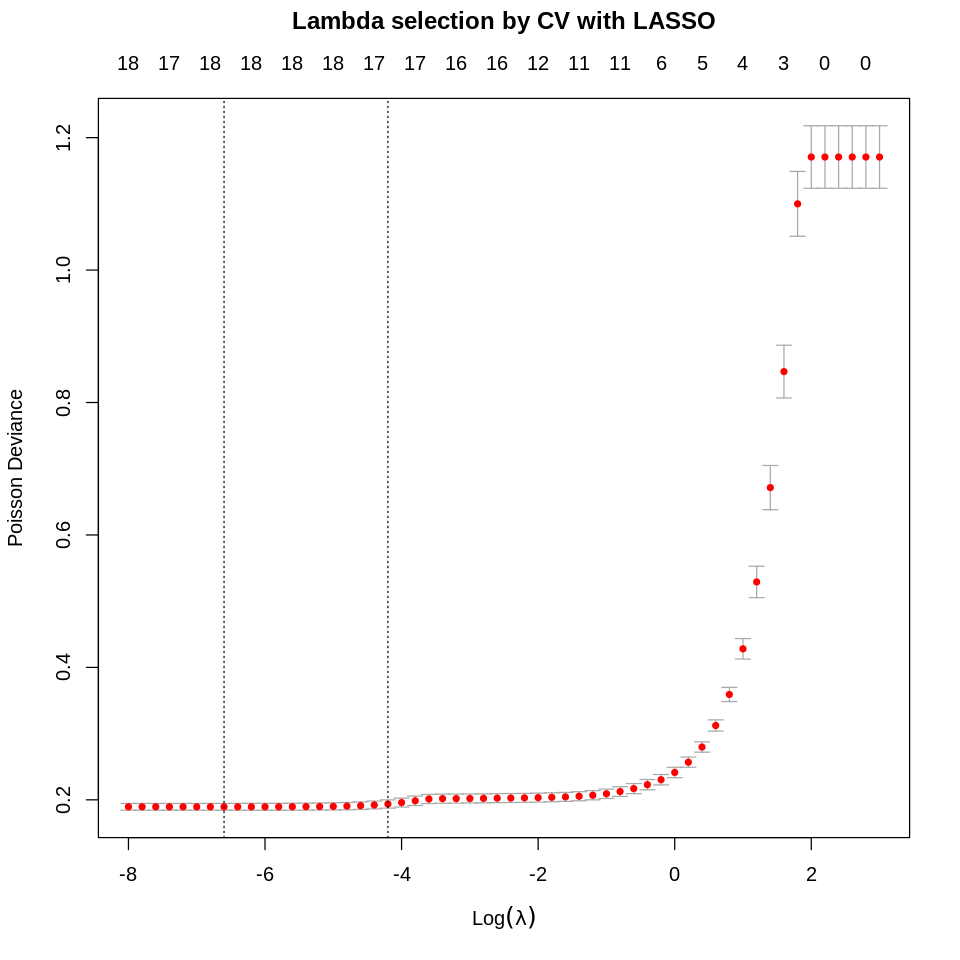

Figure 7

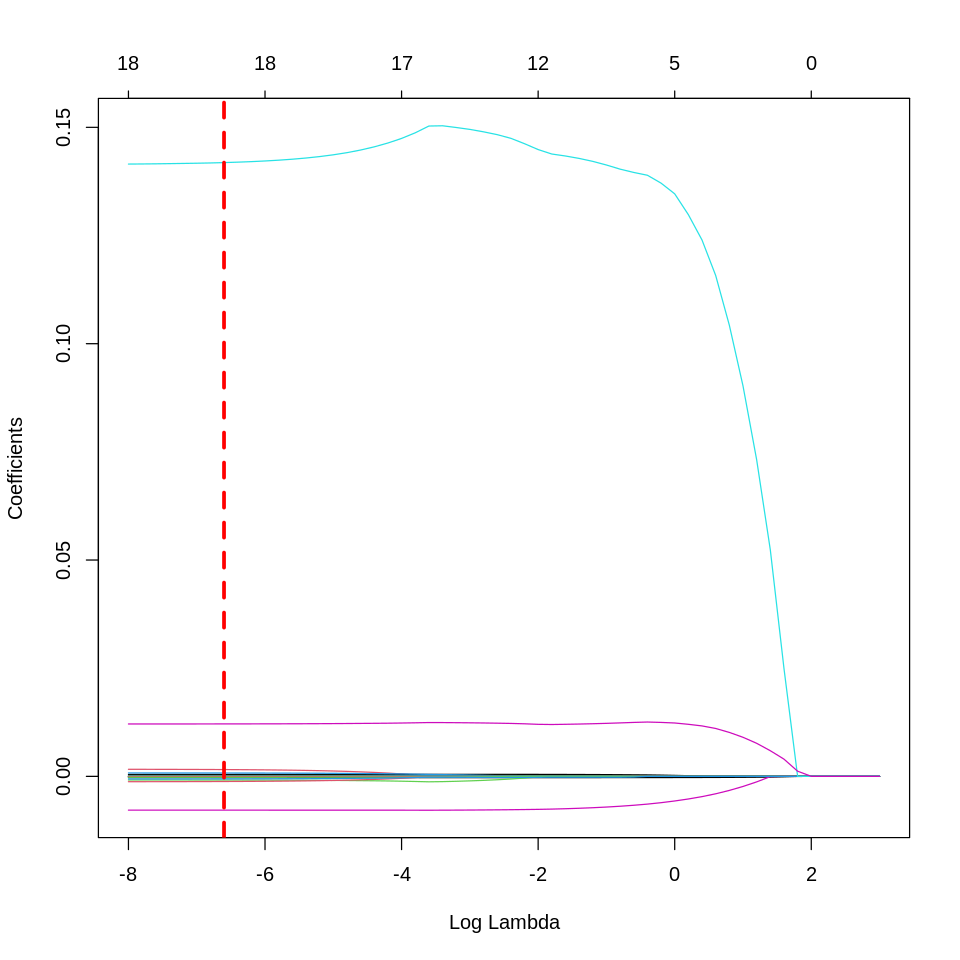

In [151]:
set.seed(123)
cv_lambda_LASSO <- cv.glmnet(
  x = as.matrix(expectancy_train[,-c(1,2)]), y = as.matrix(expectancy_train[,2]),
  alpha = 1,
  lambda = exp(seq(-8, 3, 0.2)),
  family = 'poisson'
)
lambda_min_MSE_LASSO <- round(cv_lambda_LASSO$lambda.min, 5)
cat("Figure 6\n")
plot(cv_lambda_LASSO, main = "Lambda selection by CV with LASSO\n\n")
plot(cv_lambda_LASSO$glmnet.fit, "lambda")
cat("Figure 7")
abline(v = log(lambda_min_MSE_LASSO), col = "red", lwd = 3, lty = 2)



In [152]:
lambda_min_MSE_LASSO

[1] 0.00136

The smallest lambda we found from LASSO is 0.00136.

## 2.4 Ridge Model Selection
We will also be using ridge as a model selection method. Below, we perform ridge and find the smallest lambda for our models. 

Figure 8

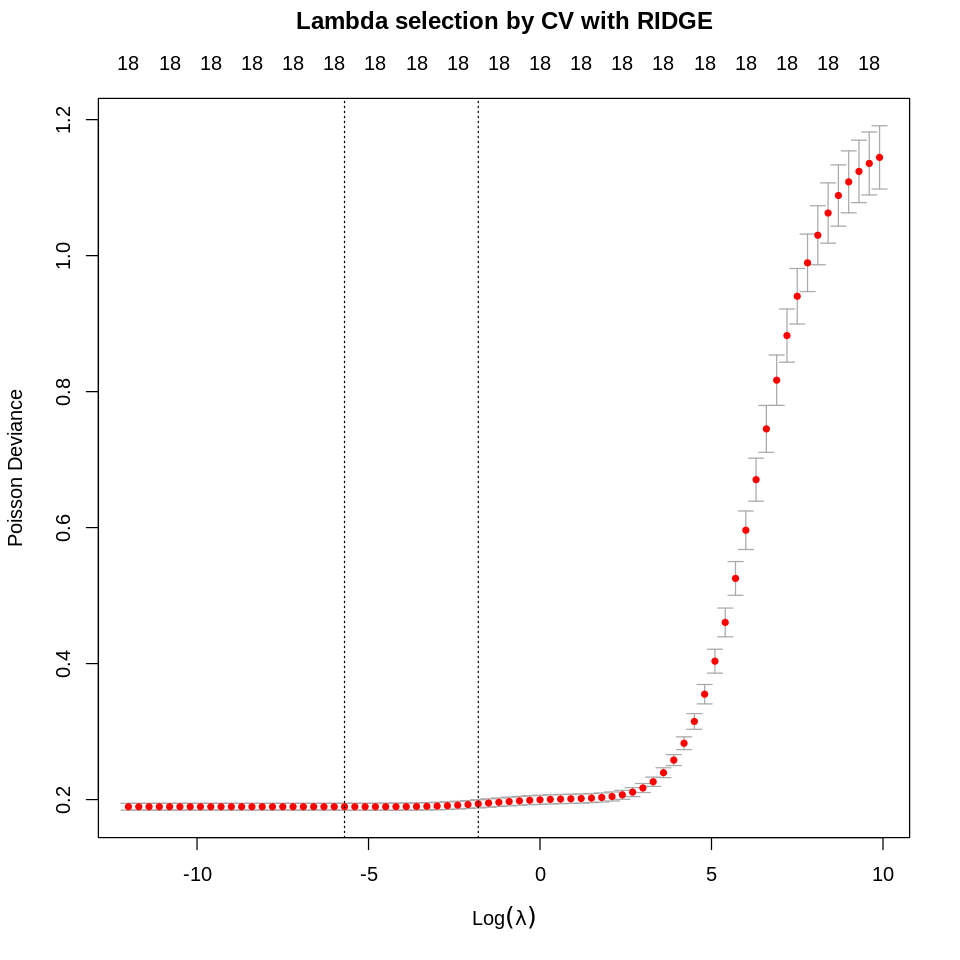

Figure 9

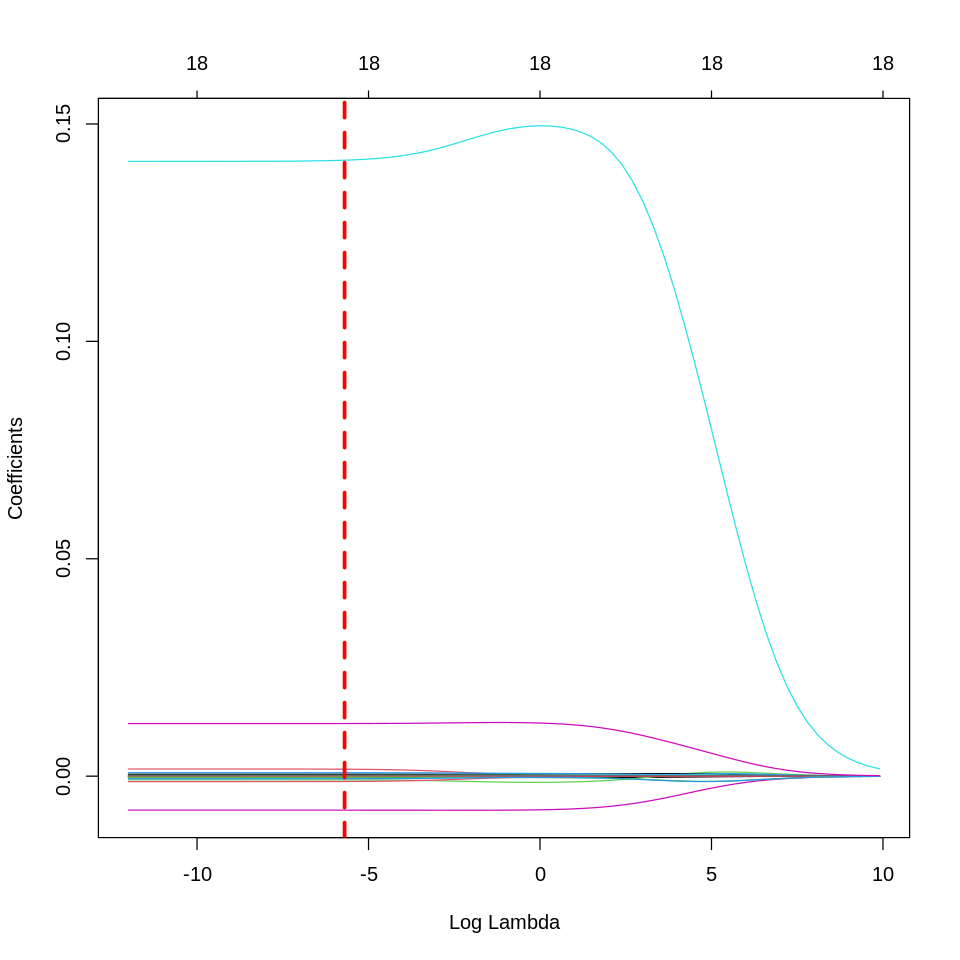

In [153]:
set.seed(123)
cat("Figure 8")
cv_lambda_RIDGE <- cv.glmnet(
  x = as.matrix(expectancy_train[,-c(1,2)]), y = as.matrix(expectancy_train[,2]),
  alpha = 0,
  lambda = exp(seq(-12, 10, 0.3)),
  family = 'poisson'
)
lambda_min_MSE_RIDGE <- round(cv_lambda_RIDGE$lambda.min, 5)
plot(cv_lambda_RIDGE, main = "Lambda selection by CV with RIDGE\n\n")
plot(cv_lambda_RIDGE$glmnet.fit, "lambda")
cat("Figure 9")
abline(v = log(lambda_min_MSE_RIDGE), col = "red", lwd = 3, lty = 2)


In [154]:
lambda_min_MSE_RIDGE

[1] 0.00335

## 2.5 Cross-Validation

We will now be performing cross-validation to test our predictive model. Below, we have a few different models. 
- `model_5CV` and `model_holdout` are the cross-validation with 5 folds and holdout models respectively built using the stepwise covariates found through the variable selection methods.
- `model_lasso_cv` and `model_lasso_holdout` are the cross validation with 5 fold and holdout models built using lasso for the cross validation and the lambda found from LASSO for the holdout model. 
- `model_ridge_cv` and `model_ridge_holdout` are the cross validation with 5 fold and holdout models built using ridge for the cross validation and the lambda found from ridge for the holdout model. 
- Lastly, `model_elastic` is the cross validation done for 5-fold using the elastic method.

In [155]:
set.seed(123)
lambda <- 10^seq(-3, 3, length = 100)
# define training control
train_control <- trainControl(method="cv", number = 5)

# train the models
#5 fold CV using stepwise covariates
model_5CV <- train(Life.expectancy~., data = expectancy_train[,stepwise_selection], 
               trControl=train_control, method="lm", preProcess = c("center", "scale"))

#stepwise covariates lm holdout
model_holdout <- lm(Life.expectancy~., data = expectancy_train[,stepwise_selection]) 

#lasso with CV
model_lasso_cv <- train(Life.expectancy~., data = expectancy_train[,-1], 
               trControl=train_control, method="glmnet", preProcess = c("center", "scale"),tuneGrid = expand.grid(alpha = 1, lambda = lambda))

#ridge with CV
model_ridge_cv <- train(Life.expectancy~., data = expectancy_train[,-1], 
               trControl=train_control, method="glmnet", preProcess = c("center", "scale"),tuneGrid = expand.grid(alpha = 0, lambda = lambda))

#lasso holdout
model_lasso_holdout <- glmnet( 
  x = as.matrix(expectancy_train[,-c(1,2)]), y = as.matrix(expectancy_train[,2]),
  alpha = 1,
  lambda = lambda_min_MSE_LASSO
)

#ridge holdout
model_ridge_holdout <- glmnet( 
  x = as.matrix(expectancy_train[,-c(1,2)]), y = as.matrix(expectancy_train[,2]),
  alpha = 0,
  lambda = lambda_min_MSE_RIDGE
)

#elastic cv
model_elastic <- train(
  Life.expectancy ~., data = expectancy_train[,-1], method = "glmnet",
  preProcess = c("center", "scale"),
  trControl = train_control,
  tuneLength = 10
  )



Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In order to test which model is the best, we will be finding the RMSE's of the models and comparing.

In [156]:
cat("Table 9")
holdout.prediction <- predict(model_holdout, newdata = expectancy_test[,-2])

holdout.rmse <- rmse(
    preds = holdout.prediction,
    actuals = expectancy_test$Life.expectancy)

model.5CV.pred <- predict(model_5CV, newdata = expectancy_test[,-2])

model.5CV.rmse <- rmse(
    preds = model.5CV.pred,
    actuals = expectancy_test$Life.expectancy)

lasso.holdout.pred <- predict(model_lasso_holdout, newx = as.matrix(expectancy_test[,-c(1,2)]))

lasso.cv.pred <- predict(model_lasso_cv, newx = as.matrix(expectancy_test[,-c(1,2)]))

ridge.holdout.pred <- predict(model_ridge_holdout, newx = as.matrix(expectancy_test[,-c(1,2)]))

lasso.cv.pred <- predict(model_lasso_cv, model.matrix(Life.expectancy ~., expectancy_test)[,-c(1,2)])
lasso.cv.rmse <- rmse(lasso.cv.pred,expectancy_test$Life.expectancy)

ridge.cv.pred <- predict(model_ridge_cv, model.matrix(Life.expectancy ~., expectancy_test)[,-c(1,2)])
ridge.cv.rmse <- rmse(ridge.cv.pred,expectancy_test$Life.expectancy)

elastic.cv.pred <- predict(model_elastic, model.matrix(Life.expectancy ~., expectancy_test)[,-c(1,2)])
elastic.cv.rmse <- rmse(elastic.cv.pred,expectancy_test$Life.expectancy)

holdout.lasso.rmse <- rmse(
    preds = lasso.holdout.pred,
    actuals = expectancy_test$Life.expectancy)

holdout.ridge.rmse <- rmse(
    preds = ridge.holdout.pred,
    actuals = expectancy_test$Life.expectancy)

RMSE <- tibble(
    Method = "LM Hold-out",
    RMSE = holdout.rmse)

RMSE <- rbind(RMSE,tibble(
               Method = "5 fold LM CV",
               RMSE = model.5CV.rmse))

RMSE <- rbind(RMSE,tibble(
               Method = "LASSO CV",
               RMSE = lasso.cv.rmse))

RMSE <- rbind(RMSE,tibble(
               Method = "RIDGE CV",
               RMSE = ridge.cv.rmse))

RMSE <- rbind(RMSE,tibble(
               Method = "Elastic CV",
               RMSE = elastic.cv.rmse))

RMSE <- rbind(RMSE, tibble(
               Method = "LASSO Hold-out",
               RMSE = holdout.lasso.rmse))

RMSE <- rbind(RMSE, tibble(
               Method = "RIDGE Hold-out",
               RMSE = holdout.ridge.rmse))
RMSE 

Table 9

Method,RMSE
<chr>,<dbl>
LM Hold-out,3.919471
5 fold LM CV,3.919471
LASSO CV,3.664511
RIDGE CV,3.720796
Elastic CV,3.663029
LASSO Hold-out,3.667097
RIDGE Hold-out,3.663632


We can see that the model with the lowest RMSE is the elastic model with an RMSE of 3.663029. The coefficients for this model can be found below.

In [157]:
cat("Table 10")
coef(model_elastic$finalModel, model_elastic$bestTune$lambda)

Table 10

19 x 1 sparse Matrix of class "dgCMatrix"
                                          s1
(Intercept)                      69.10258900
Adult.Mortality                  -2.30326426
infant.deaths                    10.27596986
Alcohol                          -0.28613317
percentage.expenditure            0.62442166
Hepatitis.B                      -0.06411130
Measles                          -0.04012417
BMI                               0.66222164
under.five.deaths               -10.55426961
Polio                             0.27901943
Total.expenditure                 0.14502042
Diphtheria                        0.18339641
HIV.AIDS                         -2.68744580
GDP                               0.19137946
Population                        0.02274985
thinness..1.19.years             -0.02926623
thinness.5.9.years               -0.24398017
Income.composition.of.resources   1.74121425
Schooling                         2.42970613

In [158]:
model_elastic$bestTune

,alpha,lambda
,<dbl>,<dbl>
11,0.2,0.002935766


This model is a convex combination of Ridge and LASSO. The equation to understand the alpha for this elastic model is $\alpha \times LASSO + (1-\alpha) \times RIDGE$, which combines the L1 and L2 norms.

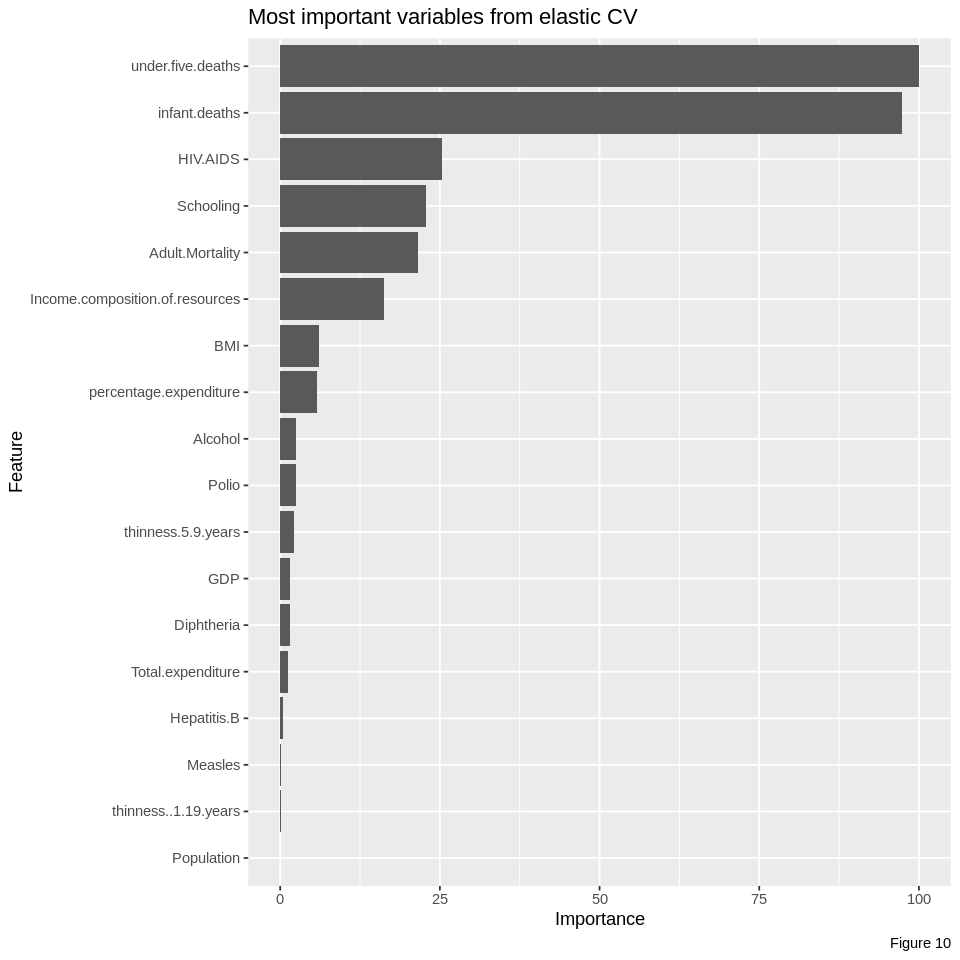

In [159]:
ggplot(varImp(model_elastic)) + ggtitle("Most important variables from elastic CV") + labs(caption = "Figure 10")

#### Observations
- The most important variables we get from this are under five deaths, infant deaths, HIV/AIDS, Adult mortality, Income composition of variables, BMI and percentage expenditure. 
- Population, thinness, Measles, Hepatitis B and total expenditure are less important.
- Alcohol and Polio are right in the middle of the variable importance graph. 

# 3. Discussion
### 3.1 Results and impacts
In our study we used variable selection methods (both forward and backward) to find that the best model is the one with 12 covariates. From there, we used those covariates to create cross-validation models with 5-fold and holdout models. Additionally, we performed LASSO and ridge and created 5-fold cross validation and hold-out models for the two. The last type of model we did was an elastic cross-validation model.
We discovered by comparing RMSE that the best model is the elastic cross-validation, and thus found the coefficients for the specific model. Our findings help us see the best model in predicting life expectancy, thus also allowing us to see which factors affect life expectancy the most. Our analysis showed us that Under-five deaths, infant deaths, HIV/AIDS, Adult Mortality, Schooling and income composition of resources are the factors that affect life expectancy the most.   

### 3.2 Are the results what we expected?
- It is unsurprising that a disease such as HIV/AIDS affect life expectancy. One could question why Measles was not equally as important, but a reason for this could be that there is a vaccine which is quite widespread, and so the disease is not as impactful anymore.
- Similarly, infant deaths, under five deaths and adult mortality being the most important are also what we expected, as they directly involve life expectancy. 
- Our variable selection methods suggest that Alcohol is an important aspect of our model, but the Important variables for our best model seem to suggest otherwise. We would expect Alcohol to be higher up on the important variables graph.

### 3.3 Improvements that could be made
- This study only takes into account additive models, and so, we are not able to explore the relationship between variables in the model. While we showed that the $C_p$ is much higher with interactions, our model could be improved using interactions, so there is further room for improvement here.

### 3.4 Future questions/research
Our results with this study hae allowed us to see the factors affecting life expectancy and the best way to predict life expectancy in any random country. In the future, this study could lead to questions about:
- How can governments help in increasing life expectancy and what areas should they be focusing on specifically?
- The data in this study predates Covid-19. How much does Covid-19 affect life expectancy and how much would it change our model?
- As mentioned above, the data in this study is from 2000 - 2015. There have been multiple advancements in the medical field since then. Further, 15 years is also a long period of time. It would be interesting to explore how for different and shorter periods of time how life expectancy changes and how its changed over time. 

# 4. References

$^{(1)}$ World Health Organisation (WHO). (2018, February 10). Life expectancy (WHO). Kaggle. Retrieved November 6, 2021, from https://www.kaggle.com/kumarajarshi/life-expectancy-who. 

$^{(2)}$ Tier 1-life expectancy and wellbeing-1.19 life expectancy at birth. Department of Health | Tier 1-Life expectancy and wellbeing-1.19 Life expectancy at birth. (n.d.). Retrieved November 6, 2021, from https://www1.health.gov.au/internet/publications/publishing.nsf/Content/oatsih-hpf-2012-toc~tier1~life-exp-wellb~119. 

National Progress Report 2025 Goal: Reduce HBV Deaths. (2021, June 03). Retrieved from https://www.cdc.gov/hepatitis/policy/NPR/2021/NationalProgressReport-HepB-ReduceDeaths.htm

Clinical Features of Diphtheria. (2020, May 26). Retrieved from https://www.cdc.gov/diphtheria/clinicians.html